In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Base URL of your Dockerized API
BASE_URL = "http://127.0.0.1:8000"

# Example: Sending a GET request with depth_min and depth_max
response = requests.get(f"{BASE_URL}/get-frames", params={"depth_min": 9003.0, "depth_max": 9100})
print(response.status_code)
# print(response.text)
# print("Response:", response.json())

200


In [3]:
def plot_resized_image(response_json, cmap):
    frames = response_json['frames']
    # Sort frames by depth
    frames = sorted(frames, key=lambda x: x['depth'])

    # Extract depth values
    depths = [frame['depth'] for frame in frames]
    depth_min, depth_max = min(depths), max(depths)

    # Convert frames to a 2D numpy array (excluding the 'depth' column)
    image_data = np.array([[pixel for key, pixel in frame.items() if key != 'depth'] for frame in frames])

    # Determine equally spaced indices for displaying depth values
    num_ticks = 10
    tick_indices = np.linspace(0, len(depths) - 1, num=num_ticks, dtype=int)
    tick_labels = [f"{depths[i]:.1f}" for i in tick_indices]

    # Plot the image using matplotlib
    plt.figure(figsize=(8, 10))
    plt.imshow(image_data, cmap=cmap, aspect='auto') 
    plt.colorbar(label='Pixel Intensity')

    # Set custom y-tick positions and labels
    plt.gca().set_yticks(tick_indices)  # Set y-tick positions
    plt.gca().set_yticklabels(tick_labels, fontsize=8)  # Update labels to show selected depths
    
    plt.title(f'Resized image from depth_min={depth_min} to depth_max={depth_max}')
    plt.xlabel('Column Index')
    plt.ylabel('Depth')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

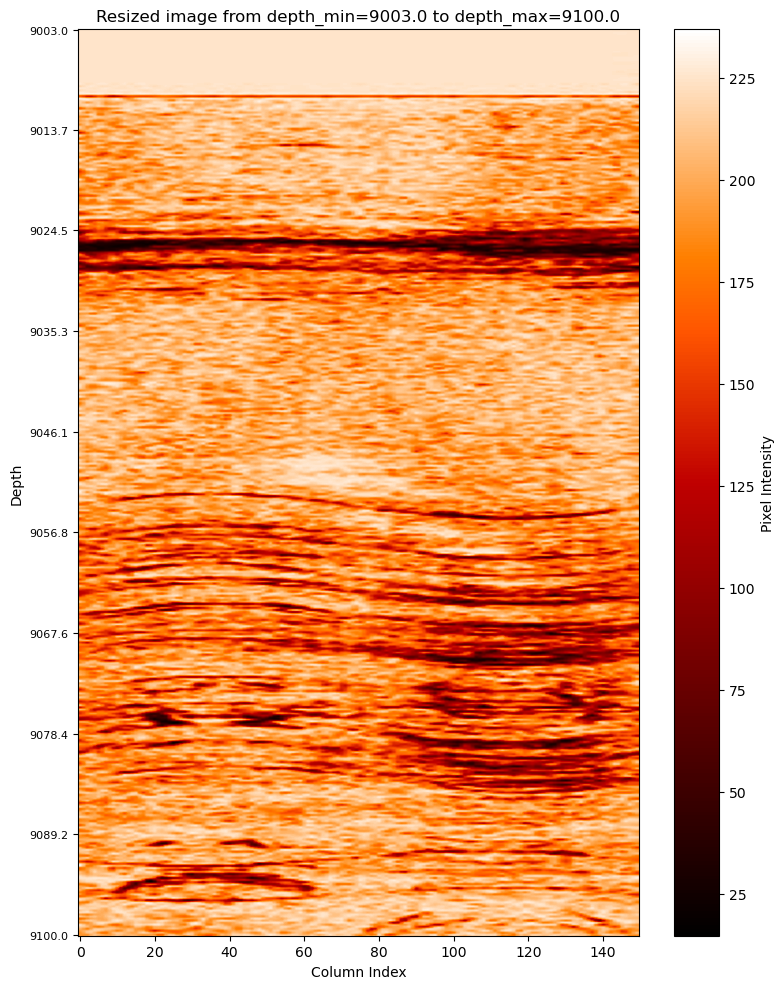

In [4]:
plot_resized_image(response.json(), cmap='gist_heat')